In [2]:
##Figure Setting
font_name = 'Helvetica'
font_size = 12
fig_dpi = 600

#AGU recommend .eps for vector, .tiff for raster and .jpg for large raster
#Google Doc support .jpg, .png and .gif only
fig_ext = '.jpg'

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from pysar.utils import ptime, readfile, writefile
from pysar import ifgram_inversion as pinv, view as pp


work_dir = '/Users/yunjunz/development/python/2018_ComputGeosci_PySAR'
os.chdir(work_dir)
print('Go to directory: '+work_dir)

Go to directory: /Users/yunjunz/development/python/2018_ComputGeosci_PySAR


In [22]:
### Calculate Coherence and Weights
epsilon = 1e-2
c0 = np.linspace(0., 1.0, 1000)
c = np.array(c0)
c[c < epsilon] = epsilon
c[c > 1.-epsilon] = 1-epsilon

## 1. Uniform weight - Berardino et al., 2002, IEEE-TGRS
w_uniform = np.linspace(1., 1.,len(c))
w_uniform /= np.max(w_uniform)

## 2. Linear - (Perissin and Wang, 2012, IEEE-TGRS; Tong et al., 2016, RSE)
w_coh = np.array(c)
w_coh[w_coh < epsilon] = epsilon
w_coh /= np.max(w_coh)

## 3. Variance
L = 75
w_var = 1.0 / pinv.coherence2phase_variance_ds(c, L)
w_var /= np.max(w_var)

## 4. Fisher info matrix
w_fim = pinv.coherence2fisher_info_index(c, L)
w_fim /= np.max(w_fim)
print('Done.')

Done.


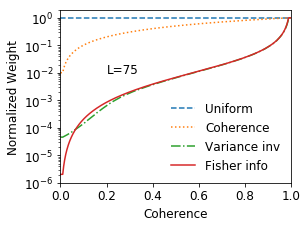

In [23]:
## Weighting functions
fig = plt.figure(figsize=[4, 3])
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.plot(c0, w_uniform, ':', label='Uniform')
ax.plot(c0, w_coh, '--', label='Coherence')
ax.plot(c0, w_var, '-.', label='Variance inv')
ax.plot(c0, w_fim,'-', label='Fisher info')

ax.set_yscale('log');   ax.set_ylim(ymin=1e-6)
#ax.set_xscale('log')
ax.tick_params(labelsize=font_size)
ax.set_xlabel('Coherence', fontsize=font_size)
ax.set_ylabel('Normalized Weight', fontSize=font_size)

plt.legend(fontsize=font_size, frameon=False, ncol=1)
ax.text( 0.20, 1.0e-2, 'L=%s'%(L), fontsize=font_size)
ax.set_xlim([0., 1.])

#plt.legend(loc=(0.02,0.08), fontsize=font_size)
#ax.text( 0.60, 1.0e-1, 'Uniform', color=pp.mplColors[0], fontsize=font_size)
#ax.text( 0.20, 1.5e-3, 'Coherence', color=pp.mplColors[1], fontsize=font_size)
#ax.text( 0.20, 0.5e-6, , color=pp.mplColors[2], fontsize=font_size)
#ax.text( 0.20, 1.0e-8, , color=pp.mplColors[3], fontsize=font_size)

plt.savefig('./PIC/weight_function'+fig_ext, bbox_inches='tight', dpi=fig_dpi)
plt.show()
